In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Transformed Dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [6]:
df['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

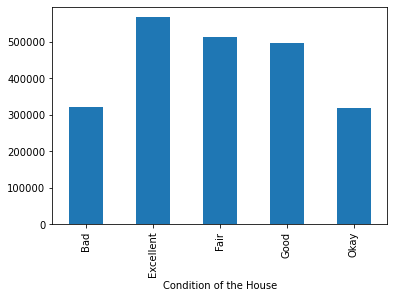

In [7]:
# relation between condition of the house and sale price
df.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar')
                             

<AxesSubplot:xlabel='Condition of the House'>

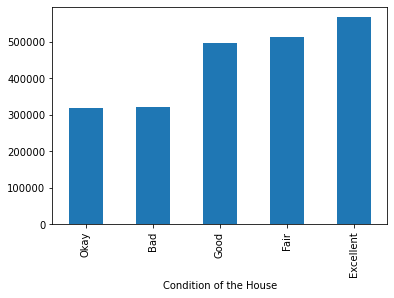

In [8]:
#arrange in asecending order

df.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Waterfront View'>

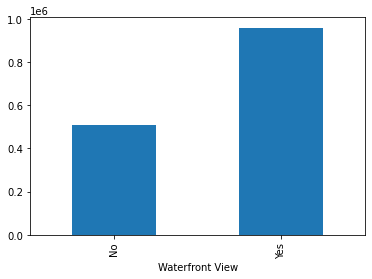

In [9]:
df.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Ever Renovated'>

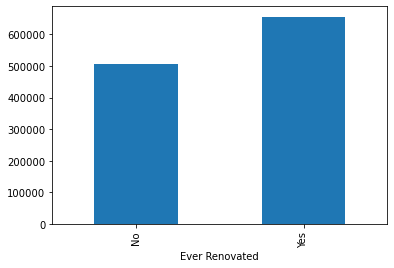

In [10]:
df.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Zipcode'>

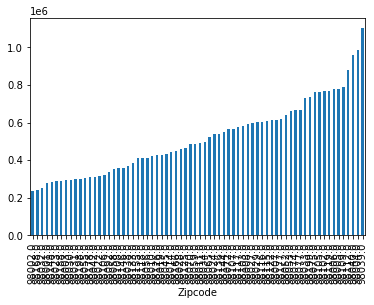

In [11]:
df.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

ANOVA 

In [12]:
#Libraries for ANOVA

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [13]:
# rename  categorical columns name whichhas the space

df=df.rename(columns={'Sale Price':'Sale_Price','Condition of the House':'Condition_of_house','Ever Renovated':'Ever_renovated','Waterfront View':'Waterfront_view'})

In [14]:
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_house,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_renovated,years since renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [15]:
model=ols('Sale_Price ~ Condition_of_house',data=df).fit()

In [16]:
Anova_table=sm.stats.anova_lm(model,type=2)
Anova_table
  #it is Alternate hypotesis their is difference in  mean  

,df,sum_sq,mean_sq,F,PR(>F)
Condition_of_house,4.0,1.441831e+13,3.604579e+12,58.25563,5.447605e-49
Residual,21604.0,1.336752e+15,6.187520e+10,NaN,NaN


In [17]:
model=ols('Sale_Price ~ Waterfront_view',data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
Waterfront_view,1.0,3.283737e+13,3.283737e+13,538.192683,1.275558e-117
Residual,21607.0,1.318333e+15,6.101415e+10,NaN,NaN


In [18]:
model=ols('Sale_Price ~ Ever_renovated',data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
Ever_renovated,1.0,1.998463e+13,1.998463e+13,324.378469,5.419055e-72
Residual,21607.0,1.331185e+15,6.160899e+10,NaN,NaN


In [19]:
model=ols('Sale_Price ~ Zipcode',data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
Zipcode,1.0,2.503765e+12,2.503765e+12,40.112844,2.444308e-10
Residual,21607.0,1.348666e+15,6.241803e+10,NaN,NaN


DUMMY VARIABLES

In [20]:
df=pd.get_dummies(df,columns=['Condition_of_house'],drop_first=True)
df 

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_renovated,years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,8,...,47.6993,-122.346,1530.0,1509,No,0,0,1,0,0
21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,8,...,47.5107,-122.362,1830.0,7200,No,0,0,1,0,0
21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,7,...,47.5944,-122.299,1020.0,2007,No,0,0,1,0,0
21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,8,...,47.5345,-122.069,1410.0,1287,No,0,0,1,0,0


In [21]:
df=pd.get_dummies(df,columns=['Ever_renovated','Waterfront_view'],drop_first=True)

Binning

In [22]:

#creating zip_table

zip_table=df.groupby('Zipcode').agg({'Sale_Price':"mean"}).sort_values('Sale_Price',ascending=True)
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [23]:
zip_table['Zipcode_Group']= pd.cut(zip_table['Sale_Price'], bins = 10,
                                    labels = ['Zipcode_Group_0',
                                              'Zipcode_Group_1',
                                              'Zipcode_Group_2',
                                              'Zipcode_Group_3',
                                              'Zipcode_Group_4',
                                              'Zipcode_Group_5',
                                              'Zipcode_Group_6',
                                              'Zipcode_Group_7', 
                                              'Zipcode_Group_8',
                                              'Zipcode_Group_9'
                                             ],
                                    include_lowest = True)
                                    

In [25]:

zip_table=zip_table.drop(columns='Sale_Price')
zip_table.head()

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0


Merging tables

In [26]:
df=pd.merge(df,zip_table,
            left_on='Zipcode',
            how='left',
            right_index=True)
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),years since renovation,Condition_of_house_Excellent,Condition_of_house_Fair,Condition_of_house_Good,Condition_of_house_Okay,Ever_renovated_Yes,Waterfront_view_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [27]:
df=df.drop(columns='Zipcode')

Creating Dummies for Zipcode_Group

In [28]:
df=pd.get_dummies(df,columns=['Zipcode_Group'],drop_first=True)
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.to_csv('data_2.csv')